In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class R_pca:

    def __init__(self, D, mu=None, lmbda=None):
        self.D = D
        self.S = np.zeros(self.D.shape)
        self.Y = np.zeros(self.D.shape)

        if mu:
            self.mu = mu
        else:
            self.mu = np.prod(self.D.shape) / (4 * self.norm_p(self.D, 2))

        self.mu_inv = 1 / self.mu

        if lmbda:
            self.lmbda = lmbda
        else:
            self.lmbda = 1 / np.sqrt(np.max(self.D.shape))

    @staticmethod
    def norm_p(M, p):
        return np.sum(np.power(M, p))

    @staticmethod
    def shrink(M, tau):
        return np.sign(M) * np.maximum((np.abs(M) - tau), np.zeros(M.shape))

    def svd_threshold(self, M, tau):
        U, S, V = np.linalg.svd(M, full_matrices=False)
        return np.dot(U, np.dot(np.diag(self.shrink(S, tau)), V))

    def fit(self, tol=None, max_iter=1000, iter_print=100):
        iter = 0
        err = np.Inf
        Sk = self.S
        Yk = self.Y
        Lk = np.zeros(self.D.shape)

        if tol:
            _tol = tol
        else:
            _tol = 1E-7 * self.norm_p(np.abs(self.D), 2)

        while (err > _tol) and iter < max_iter:
            Lk = self.svd_threshold(
                self.D - Sk + self.mu_inv * Yk, self.mu_inv)
            Sk = self.shrink(
                self.D - Lk + (self.mu_inv * Yk), self.mu_inv * self.lmbda)
            Yk = Yk + self.mu * (self.D - Lk - Sk)
            err = self.norm_p(np.abs(self.D - Lk - Sk), 2)
            iter += 1
            if (iter % iter_print) == 0 or iter == 1 or iter > max_iter or err <= _tol:
                print('iteration: {0}, error: {1}'.format(iter, err))

        self.L = Lk
        self.S = Sk
        return Lk, Sk

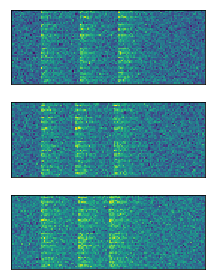

In [10]:
from twpca.datasets import jittered_population

data = jittered_population(max_jitter=5)[0]# + jittered_population()[0]
data += 0.2*np.random.randn(*data.shape)
data = data

fig, axes = plt.subplots(3, 1)
for ax, trial in zip(axes, data):
    ax.imshow(trial.T)
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()

In [11]:
simple_data = data.mean(axis=-1)

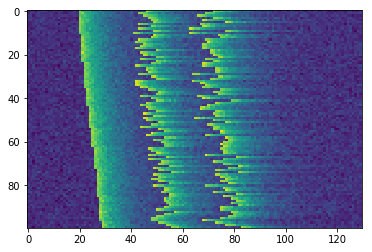

In [12]:
plt.imshow(simple_data, aspect='auto')

In [45]:
rpca = R_pca(simple_data, mu=0.01)

In [46]:
rpca.fit(max_iter=10000);

iteration: 1, error: 397.2815614243893
iteration: 100, error: 8.612542554385401
iteration: 200, error: 3.9572073033762436
iteration: 300, error: 1.3297143404715004
iteration: 400, error: 0.5723275470543999
iteration: 500, error: 0.2957341859574793
iteration: 600, error: 0.1754373398898814
iteration: 700, error: 0.10727837437654322
iteration: 800, error: 0.06962352728588822
iteration: 900, error: 0.04677361637515334
iteration: 1000, error: 0.033505914591387756
iteration: 1100, error: 0.024550487027982897
iteration: 1200, error: 0.01900980607565224
iteration: 1300, error: 0.014365130901437219
iteration: 1400, error: 0.011032591432159358
iteration: 1500, error: 0.008750632046124727
iteration: 1600, error: 0.006821081860258357
iteration: 1700, error: 0.005326735499757861
iteration: 1800, error: 0.004145636648364576
iteration: 1900, error: 0.0033372009544317075
iteration: 2000, error: 0.0027807100688178286
iteration: 2100, error: 0.002338974720061197
iteration: 2200, error: 0.00198051846148

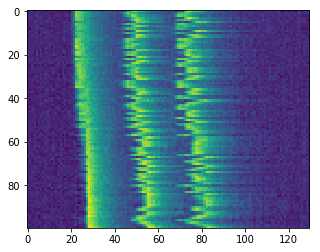

In [47]:
plt.imshow(rpca.L)

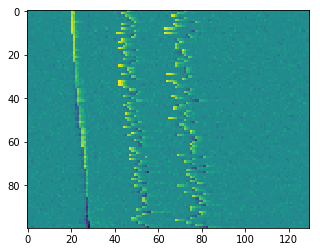

In [48]:
plt.imshow(rpca.S)

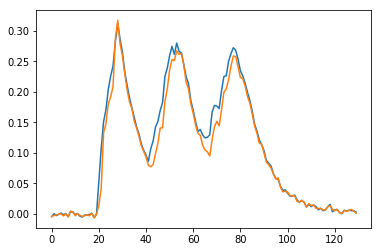

In [49]:
plt.plot(np.mean(simple_data, axis=0))
plt.plot(np.mean(rpca.L, axis=0))